# ANALYZING STUDENT ATTITUDE AND BEHAVIOUR 

# Step 1: Import Libraries

In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Step 2: Load the Dataset

In [107]:
data = pd.read_csv('D:\DataScienceVideos\Student Attitude and Behavior.csv')

In [108]:
print(data.head())  # View first few rows

  Certification Course  Gender Department  Height(CM)  Weight(KG)  10th Mark  \
0                   No    Male        BCA       100.0        58.0       79.0   
1                   No  Female        BCA        90.0        40.0       70.0   
2                  Yes    Male        BCA       159.0        78.0       71.0   
3                  Yes  Female        BCA       147.0        20.0       70.0   
4                   No    Male        BCA       170.0        54.0       40.0   

   12th Mark  college mark        hobbies daily studing time  \
0       64.0          80.0    Video Games      0 - 30 minute   
1       80.0          70.0         Cinema     30 - 60 minute   
2       61.0          55.0         Cinema         1 - 2 Hour   
3       59.0          58.0  Reading books         1 - 2 Hour   
4       65.0          30.0    Video Games     30 - 60 minute   

  prefer to study in  salary expectation Do you like your degree?  \
0            Morning               40000                       No

In [109]:
print(data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [110]:
print(data.describe())  # Summary statistics

       Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  235.000000  235.000000  235.000000  235.000000    235.000000   
mean   157.402128   60.803830   76.848511   68.775872     70.660553   
std     21.510805   14.895844   13.047560   11.018192     15.727446   
min      4.500000   20.000000    7.400000   45.000000      1.000000   
25%    152.000000   50.000000   70.000000   60.000000     60.000000   
50%    160.000000   60.000000   80.000000   69.000000     70.000000   
75%    170.000000   70.000000   86.250000   76.000000     80.000000   
max    192.000000  106.000000   98.000000   94.000000    100.000000   

       salary expectation  
count        2.350000e+02  
mean         3.248168e+04  
std          1.113146e+05  
min          0.000000e+00  
25%          1.500000e+04  
50%          2.000000e+04  
75%          2.500000e+04  
max          1.500000e+06  


# Step 4: Split Data into Features and Target
Separate the features (independent variables) from the target variable.

In [111]:
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Now we can proceed with dropping the target column and splitting the data
X = data.drop(columns=['willingness to pursue a career based on their degree'])
y = data['willingness to pursue a career based on their degree']

# Step 5: Preprocessing
Apply preprocessing steps including imputation, encoding, and scaling using ColumnTransformer.We'll create separate transformers for numeric and non-numeric columns and handle them accordingly.

In [112]:
# Numeric features for scaling
numeric_features = ['Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'salary expectation']

# Categorical features for encoding
categorical_features = ['Certification Course', 'Gender', 'Department', 'hobbies', 
                        'daily studing time', 'prefer to study in', 'Do you like your degree?', 
                        'social medai & video', 'Travelling Time', 'Stress Level', 'Financial Status', 
                        'part-time job']


In [113]:
# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [114]:
# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)


In [115]:
print("Shape of preprocessed data:", X_preprocessed.shape)
print("First few rows of preprocessed data:")
print(X_preprocessed[:5])


Shape of preprocessed data: (235, 52)
First few rows of preprocessed data:
[[-2.67422119 -0.18863076  0.16524788 -0.43437854  0.59509862  0.06768532
   1.          0.          0.          1.          0.          0.
   1.          0.          0.          0.          0.          1.
   1.          0.          0.          0.          0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          1.          0.        ]
 [-3.14009612 -1.39960075 -0.52600857  1.02086485 -0.04208968 -0.15738268
   1.          0.          1.          0.          0.          0.
   1.          0.          1.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.


# Step 6: Train-Test Split
Split the data into training and testing sets.

In [116]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed , y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (188, 52)
Shape of X_test: (47, 52)
Shape of y_train: (188,)
Shape of y_test: (47,)


# Step 7: Train Models
Train various machine learning models.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Setting max_iter to 1000
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    accuracy = model.score(X_test, y_test)  # Evaluate the model on the test set
    print(f"{name}: Accuracy = {accuracy:.2f}")



Logistic Regression: Accuracy = 0.55
Decision Tree: Accuracy = 0.40
Random Forest: Accuracy = 0.40
Support Vector Machine: Accuracy = 0.47


# Model Comparison:

In [118]:
# 1. Model Comparison
best_model_name = max(models, key=lambda k: models[k].score(X_test, y_test))
best_model_accuracy = models[best_model_name].score(X_test, y_test)
print(f"Best Model: {best_model_name}, Accuracy: {best_model_accuracy:.2f}")


Best Model: Logistic Regression, Accuracy: 0.55


# Hyperparameter Tuning (example with Grid Search):

In [119]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Define hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define StratifiedKFold cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search for Decision Tree with StratifiedKFold
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=stratified_kfold)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train a new Decision Tree with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)


C:\Users\dipgu\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeClassifier(max_depth=3, min_samples_split=5)

# Feature Importance (for Decision Tree or Random Forest):

In [120]:
# Train the Decision Tree model with the best parameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)

# Extract feature importances from the Decision Tree model
tree_feature_importances = best_decision_tree.feature_importances_

# Train the Random Forest model with the best parameters
best_random_forest = RandomForestClassifier(**best_params)
best_random_forest.fit(X_train, y_train)

# Extract feature importances from the Random Forest model
forest_feature_importances = best_random_forest.feature_importances_

# Get column names from preprocessor
column_names = preprocessor.transformers_[0][2] + preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist()

# Create DataFrames to display feature importances for both models
tree_feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance (Decision Tree)': tree_feature_importances})
forest_feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance (Random Forest)': forest_feature_importances})

# Merge the DataFrames on the 'Feature' column
feature_importance_df = pd.merge(tree_feature_importance_df, forest_feature_importance_df, on='Feature')

# Display feature importances
print("Feature Importance (Decision Tree):")
print(tree_feature_importance_df)

print("\nFeature Importance (Random Forest):")
print(forest_feature_importance_df)

print("\nMerged Feature Importance:")
print(feature_importance_df)


Feature Importance (Decision Tree):
                                     Feature  Importance (Decision Tree)
0                                 Height(CM)                    0.000000
1                                 Weight(KG)                    0.000000
2                                  10th Mark                    0.322253
3                                  12th Mark                    0.000000
4                               college mark                    0.192642
5                         salary expectation                    0.000000
6                    Certification Course_No                    0.000000
7                   Certification Course_Yes                    0.000000
8                              Gender_Female                    0.000000
9                                Gender_Male                    0.000000
10  Department_B.com Accounting and Finance                     0.000000
11                      Department_B.com ISM                    0.000000
12             

# Compare Feature Importances



In [121]:
from scipy.stats import spearmanr

# Extract feature importances
decision_tree_importance = feature_importance_df['Importance (Decision Tree)']
random_forest_importance = feature_importance_df['Importance (Random Forest)']

# Compute Spearman correlation coefficient and p-value
correlation_coefficient, p_value = spearmanr(decision_tree_importance, random_forest_importance)

# Print the correlation coefficient and p-value
print("Spearman Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)


Spearman Correlation Coefficient: 0.31260794036254025
p-value: 0.02405020175326402


# Feature Selection

In [122]:
from sklearn.feature_selection import RFE


# Convert X_train to a DataFrame if it's a NumPy array
X_train_df = pd.DataFrame(X_train)

# Initialize RandomForestClassifier
clf = RandomForestClassifier(**best_params)

# Initialize RFE with the classifier and the desired number of features to select
rfe = RFE(estimator=clf, n_features_to_select=10, step=1)

# Fit RFE to the training data
rfe.fit(X_train_df, y_train)

# Get the selected features
selected_features = X_train_df.columns[rfe.support_]

# Subset the training and test data with the selected features
X_train_selected = X_train_df[selected_features]
X_test_selected = X_test[selected_features]

# Retrain the model using the selected features
clf.fit(X_train_selected, y_train)

###This code demonstrates how to perform feature selection using RFE with a RandomForestClassifier and retrain the model with the selected features.


RandomForestClassifier(max_depth=3, min_samples_split=5)

# Cross-Validation:

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize RandomForestClassifier with the best hyperparameters
clf = RandomForestClassifier(**best_params)

# Perform k-fold cross-validation with k=5
cv_scores = cross_val_score(clf, X_train_selected, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))


C:\Users\dipgu\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.47368421 0.5        0.5        0.45945946 0.48648649]
Mean CV Accuracy: 0.48392603129445233
Standard Deviation of CV Accuracy: 0.015664028221934263


In [124]:
column_names = data.columns.tolist()

print(column_names)

['Certification Course', 'Gender', 'Department', 'Height(CM)', 'Weight(KG)', '10th Mark', '12th Mark', 'college mark', 'hobbies', 'daily studing time', 'prefer to study in', 'salary expectation', 'Do you like your degree?', 'willingness to pursue a career based on their degree', 'social medai & video', 'Travelling Time', 'Stress Level', 'Financial Status', 'part-time job']


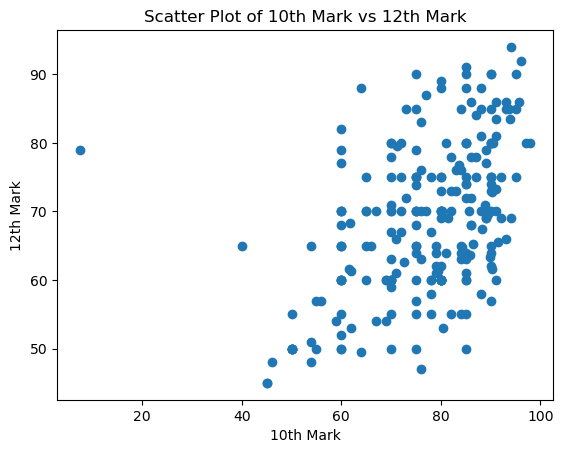

In [125]:
import matplotlib.pyplot as plt



# Scatter plot
plt.scatter(data['10th Mark'], data['12th Mark'])

# Add labels and title
plt.xlabel('10th Mark')
plt.ylabel('12th Mark')
plt.title('Scatter Plot of 10th Mark vs 12th Mark')

# Show plot
plt.show()